In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

%matplotlib inline

# EDA

In [115]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

In [116]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Preparing the dataset

In [118]:
subset = df[df.ocean_proximity.isin(['<1H OCEAN', 'INLAND'])]
subset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [119]:
subset.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [120]:
subset = subset.fillna(0)
subset.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [121]:
# log transform to median_house_value

subset['median_house_value'] = np.log1p(subset['median_house_value'])

In [122]:
# split Dataset

In [123]:
df_features = subset.drop(['median_house_value'], axis=1)
df_target = subset['median_house_value']

In [124]:
feature_full_train, feature_test, target_full_train, target_test = train_test_split(df_features, df_target, random_state=1, test_size=0.2)
feature_train, feature_val, target_train, target_val = train_test_split(feature_full_train, target_full_train, random_state=1, test_size=0.25)

print(*(len(i) for i in [feature_train, target_train, feature_val, target_val, feature_test, target_test]))

9411 9411 3138 3138 3138 3138


In [125]:
# vectorize fitures

In [126]:
categorical = list(df_features.dtypes[df_features.dtypes == 'object'].index)
categorical

['ocean_proximity']

In [127]:
numerical = list(df_features.dtypes[df_features.dtypes != 'object'].index)
numerical

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [128]:
def vectorize(df_train, df_val):
    dv = DictVectorizer(sparse=False)

    train_dict = df_train.to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)


    val_dict = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)

    return X_train, X_val, dv

In [129]:
X_train, X_val, dv = vectorize(feature_train, feature_val)

### Question 1

Let's train a decision tree regressor to predict the median_house_value variable.
* Train a model with max_depth=1.

Which feature is used for splitting the data?


In [130]:
model_tree = DecisionTreeRegressor(max_depth=1)
model_tree.fit(X_train, target_train)
y_pred = model_tree.predict(X_val)
mean_squared_error(target_val, y_pred, squared=False).round(3)

0.452

In [131]:
print(export_text(model_tree, feature_names=list(dv.get_feature_names())))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



Answer: ocean_proximity

### Question 2

Train a random forest model with these parameters:

* n_estimators=10
* random_state=1
* n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on validation?

In [132]:
model_rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
model_rf.fit(X_train, target_train)
y_pred_rf = model_rf.predict(X_val)
mean_squared_error(target_val, y_pred_rf, squared=False).round(3)

0.244

Answer: 0.244

### Question 3

Now let's experiment with the n_estimators parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set random_state to 1.
* Evaluate the model on the validation dataset.

After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for retrieving the answer.

In [133]:
scores = []

for n_est in range(10, 201, 10):
    model_rf = RandomForestRegressor(random_state=1, n_estimators=n_est)
    model_rf.fit(X_train, target_train)
    y_pred = model_rf.predict(X_val)
    rmse = mean_squared_error(target_val, y_pred, squared=False)
    scores.append((n_est, rmse))

In [134]:
sc_df = pd.DataFrame(data=scores, columns=['n_estimators', 'rmse'])
sc_df

,n_estimators,rmse
0,10,0.244369
1,20,0.237824
2,30,0.236208
3,40,0.234715
4,50,0.234568
5,60,0.234192
6,70,0.234180
7,80,0.234388
8,90,0.234302
9,100,0.234144


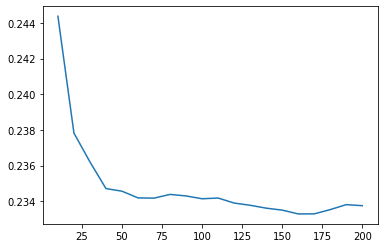

In [135]:
plt.plot(sc_df.n_estimators, sc_df.rmse)

In [136]:
sc_df.sort_values('rmse')

,n_estimators,rmse
15,160,0.233295
16,170,0.233298
14,150,0.233509
17,180,0.233537
13,140,0.233618
19,200,0.233757
12,130,0.233779
18,190,0.233815
11,120,0.233904
9,100,0.234144


In [137]:
sc_df.rmse = sc_df.rmse.round(3)
sc_df.sort_values(['rmse', 'n_estimators'])

,n_estimators,rmse
15,160,0.233
16,170,0.233
5,60,0.234
6,70,0.234
7,80,0.234
8,90,0.234
9,100,0.234
10,110,0.234
11,120,0.234
12,130,0.234


Answer: 160

### Question 4

Let's select the best max_depth:

* Try different values of max_depth: [10, 15, 20, 25]
* For each of these values,
    * try different values of n_estimators from 10 till 200 (with step 10)
    * calculate the mean RMSE
* Fix the random seed: random_state=1

What's the best max_depth, using the mean RMSE?

In [138]:
scores = []

for depth in range(10, 26, 5):
    for n_est in range(10, 201, 10):
        model_rf = RandomForestRegressor(random_state=1, max_depth=depth, n_estimators=n_est, n_jobs=-1)
        model_rf.fit(X_train, target_train)
        y_pred = model_rf.predict(X_val)
        rmse = mean_squared_error(target_val, y_pred, squared=False)
        scores.append((depth, n_est, rmse))

In [139]:
sc_df = pd.DataFrame(data=scores, columns=['max_depth', 'n_estimators', 'rmse'])
sc_df

,max_depth,n_estimators,rmse
0,10,10,0.250510
1,10,20,0.247411
2,10,30,0.246377
3,10,40,0.245170
4,10,50,0.245689
...,...,...,...
75,25,160,0.233389
76,25,170,0.233380
77,25,180,0.233571
78,25,190,0.233811


In [140]:
sc_df.rmse = sc_df.rmse.round(3)
sc_df.sort_values(['rmse', 'max_depth', 'n_estimators'])

,max_depth,n_estimators,rmse
74,25,150,0.233
75,25,160,0.233
76,25,170,0.233
35,15,160,0.234
36,15,170,0.234
...,...,...,...
7,10,80,0.246
8,10,90,0.246
20,15,10,0.246
1,10,20,0.247


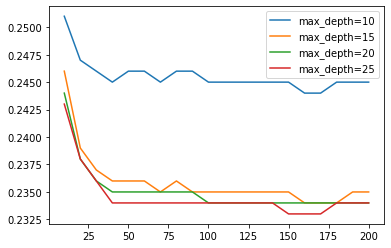

In [141]:
for d in [10, 15, 20, 25]:
    df_subset = sc_df[sc_df.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)

plt.legend()

Answer: 25

### Question 5


* Train the model with these parameters:
    * n_estimators=10,
    * max_depth=20,
    * random_state=1,
    * n_jobs=-1 (optional)
* Get the feature importance information from this model

What's the most important feature (among these 4)?

In [142]:
model_rf = RandomForestRegressor(random_state=1, max_depth=20, n_estimators=10, n_jobs=-1)
model_rf.fit(X_train, target_train)
y_pred = model_rf.predict(X_val)
rmse = mean_squared_error(target_val, y_pred, squared=False)   

In [143]:
importances = model_rf.feature_importances_
importances

array([0.01504314, 0.03006329, 0.10266505, 0.08585341, 0.33548579,
       0.21881985, 0.14745955, 0.02811472, 0.01543366, 0.02106153])

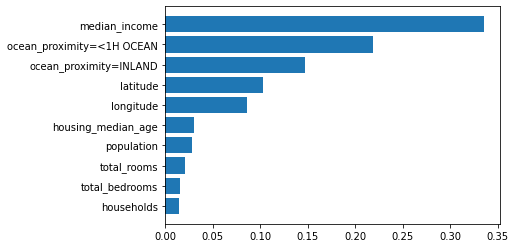

In [144]:
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(dv.get_feature_names())[indices])

Answer: mediane_income

### Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

In [145]:
xgb_params = {  'eta': 0.3, 
                'max_depth': 6,
                'min_child_weight': 1,
                
                'objective': 'reg:squarederror',
                'nthread': 8,
                
                'seed': 1,
                'verbosity': 1,
            }

Now change eta from 0.3 to 0.1.

Which eta leads to the best RMSE score on the validation dataset?

In [146]:
features = dv.get_feature_names()
features

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

In [147]:
features = [x.replace('=', '_').replace('<', '') for x in features] 
features

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity_1H OCEAN',
 'ocean_proximity_INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

In [148]:
dtrain = xgb.DMatrix(X_train, label=target_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=target_val, feature_names=features)

In [149]:
model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [150]:
y_pred = model.predict(dval)
mean_squared_error(target_val, y_pred, squared=False).round(4)

0.229

In [151]:
xgb_params['eta'] = 0.1
xgb_params

{'eta': 0.1,
 'max_depth': 6,
 'min_child_weight': 1,
 'objective': 'reg:squarederror',
 'nthread': 8,
 'seed': 1,
 'verbosity': 1}

In [152]:
model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [153]:
y_pred = model.predict(dval)
mean_squared_error(target_val, y_pred, squared=False).round(4)

0.2305

Answer: 0.3